In [10]:
%pip install matplotlib numpy pandas seaborn -q
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from constants import *

Note: you may need to restart the kernel to use updated packages.


In [22]:
df = pd.read_csv(DF_FILE)
# get utterance = 0 for speaker 1, for each digit
df_speaker_1 = df[(df['speaker'] == 1) & (df['utterance'] == 1)]
df_speaker_1.reset_index(drop=True, inplace=True)
df_speaker_1.drop(columns=['Unnamed: 0'], inplace=True)

/var/folders/r5/m5977dy13hd_9klxgsmylm740000gn/T/ipykernel_97728/3327632892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speaker_1.drop(columns=['Unnamed: 0'], inplace=True)


In [23]:
df_speaker_1

,block,utterance,speaker,gender,digit,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,1,m,0,-0.81101,-7.2382,1.54290,-0.64774,1.427100,0.613560,0.365160,0.088906,0.470310,0.98844,0.044692,0.20817,0.511400
1,1,1,1,m,0,-0.37028,-7.1336,1.88560,-0.34316,0.967330,0.327630,0.429880,0.504790,0.415330,0.28804,0.086109,0.62690,0.781150
2,1,1,1,m,0,0.59659,-8.3059,1.69430,-0.66611,0.349670,-0.174250,0.820770,1.261100,0.416530,0.50050,0.571630,0.45316,0.644650
3,1,1,1,m,0,1.45850,-8.1957,1.84540,-1.14960,0.826600,-0.513130,0.067443,0.256370,0.115000,-0.10915,0.085991,0.69064,0.337690
4,1,1,1,m,0,2.08240,-8.6670,1.19950,-1.12400,1.244500,-0.102510,0.998670,0.571740,1.038400,0.17564,-0.032857,0.53229,0.329410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,5941,1,1,m,9,1.75520,-1.1953,0.62981,-2.20440,-0.550240,-0.447700,0.363600,-0.977690,-0.167180,-0.58411,-0.455810,-0.96690,-0.377530
350,5941,1,1,m,9,0.97764,-1.3049,1.10170,-1.19200,-0.152340,-0.006121,0.655830,-1.185600,0.035035,-1.13130,-0.908750,-0.53280,-0.215070
351,5941,1,1,m,9,0.64258,-2.2270,0.65323,-0.32860,0.245930,0.205180,0.267690,-1.086000,-0.412570,-0.78075,-0.741480,-0.53496,-0.027176
352,5941,1,1,m,9,0.39527,-2.3939,0.65387,-0.44821,0.010817,0.022618,0.599320,-0.028052,0.195610,-0.67306,-0.724290,-0.51561,-0.179970


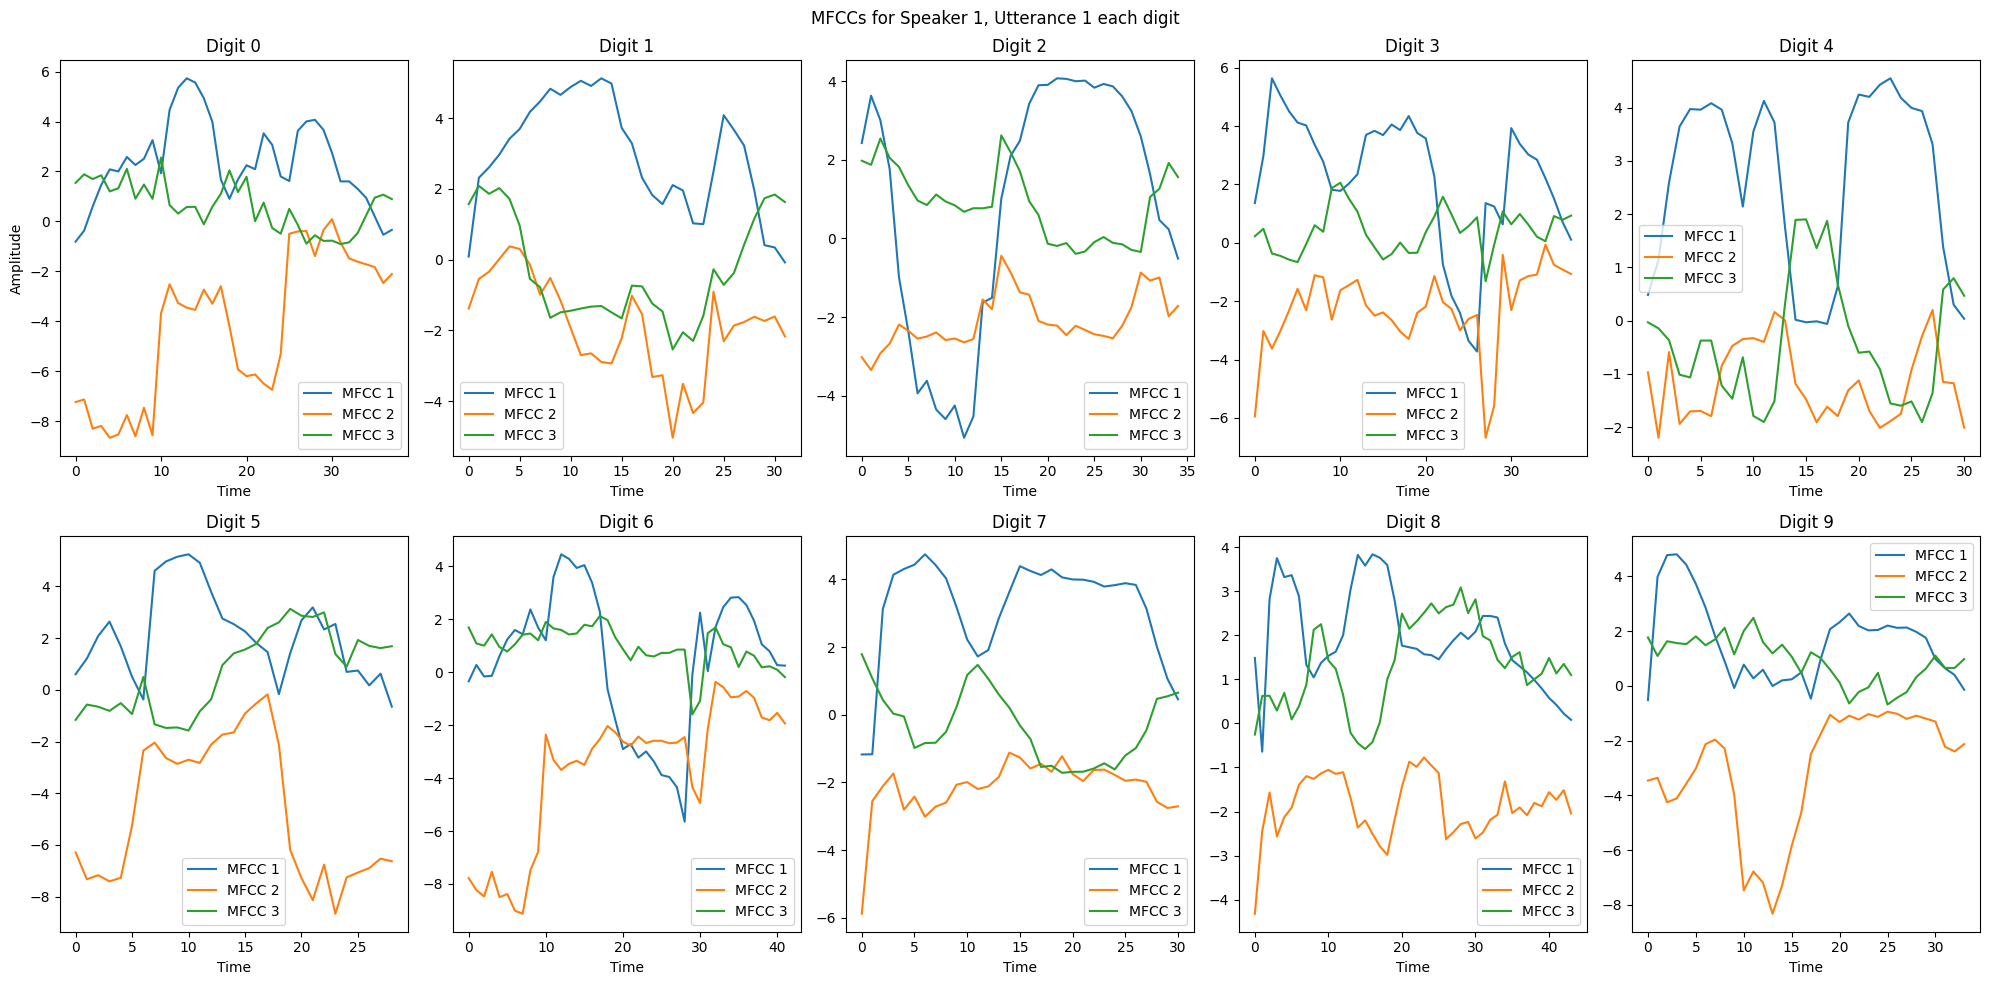

In [52]:
import matplotlib.pyplot as plt

# Create a 2x5 grid of subplots for digits 0-9
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex=False, sharey=False)

# Loop through each digit and create a plot for it
for i in range(10):
    # Filter rows where the 'digit' column matches the current digit
    df_digit = df_speaker_1[df_speaker_1['digit'] == i].reset_index(drop=True)
    
    # Drop non-numeric columns, keeping only time-series columns (0, 1, 2, etc.)
    df_digit = df_digit.drop(columns=['digit', 'speaker', 'utterance'])
    
    # Plot columns '0', '1', and '2' for the selected digit
    axs[i // 5, i % 5].plot(df_digit['0'], label='MFCC 1')
    axs[i // 5, i % 5].plot(df_digit['1'], label='MFCC 2')
    axs[i // 5, i % 5].plot(df_digit['2'], label='MFCC 3')
    
    # Set the title and labels for each subplot
    axs[i // 5, i % 5].set_title(f'Digit {i}')
    axs[i // 5, i % 5].set_xlabel('Time')
    
    # Only set the y-axis label on the first plot for clarity
    if i == 0:
        axs[i // 5, i % 5].set_ylabel('Amplitude')
    
    # Add legend
    axs[i // 5, i % 5].legend()

# Adjust layout to prevent overlap
fig.suptitle('MFCCs for Speaker 1, Utterance 1 each digit')
plt.tight_layout()
plt.savefig('../assets/mfccs_speaker_1_utterance_1_each_digit.png')
plt.show()


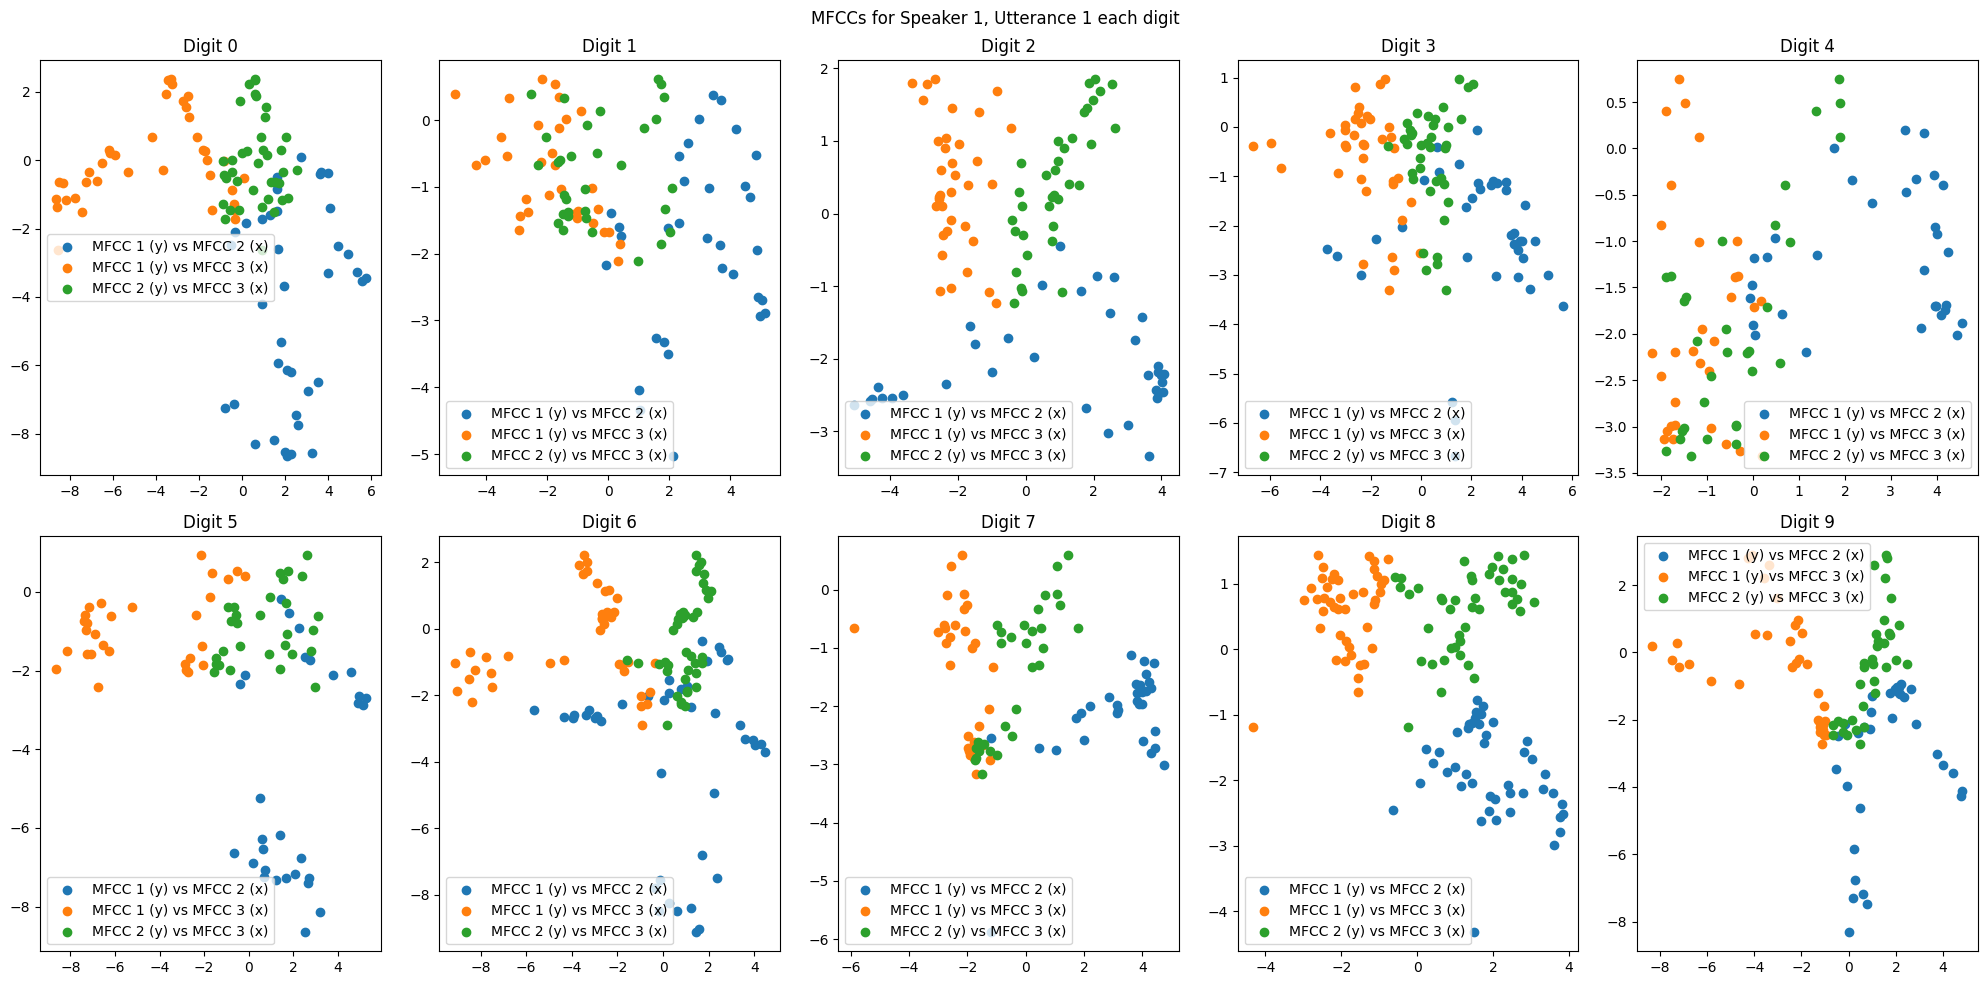

In [53]:
import matplotlib.pyplot as plt

# Create a 2x5 grid of subplots for digits 0-9
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex=False, sharey=False)

# Loop through each digit and create a plot for it
for i in range(10):
    # Filter rows where the 'digit' column matches the current digit
    df_digit = df_speaker_1[df_speaker_1['digit'] == i].reset_index(drop=True)
    
    # Drop non-numeric columns, keeping only time-series columns (0, 1, 2, etc.)
    df_digit = df_digit.drop(columns=['digit', 'speaker', 'utterance'])
    
    # Plot columns '0', '1', and '2' for the selected digit
    axs[i // 5, i % 5].scatter(df_digit['0'], df_digit['1'], label='MFCC 1 (y) vs MFCC 2 (x)')
    axs[i // 5, i % 5].scatter(df_digit['1'], df_digit['3'], label='MFCC 1 (y) vs MFCC 3 (x)')
    axs[i // 5, i % 5].scatter(df_digit['2'], df_digit['3'], label='MFCC 2 (y) vs MFCC 3 (x)')
    
    # Set the title and labels for each subplot
    axs[i // 5, i % 5].set_title(f'Digit {i}')
    
    # Add legend
    axs[i // 5, i % 5].legend()

# Adjust layout to prevent overlap
fig.suptitle('MFCCs for Speaker 1, Utterance 1 each digit')
plt.tight_layout()
plt.savefig('../assets/mfccs_speaker_1_utterance_1_each_digit_scatter.png')
plt.show()
